## Task 2.3: Matplotlib Visualizations

This notebook focuses on creating core data visualizations using Matplotlib, a foundational library in Python's data science ecosystem. Building upon the prepared dataset from the previous task, this exercise serves as a practical demonstration of Matplotlib's two primary plotting paradigms: the straightforward procedural approach and the more powerful Object-Oriented (OO) approach. The visualizations created here form the building blocks for the final project dashboard and are used to validate key hypotheses, such as the strong correlation between temperature and ridership.
Methodology and Key Steps:
1. **Data Aggregation:** The initial step involves creating a new, aggregated DataFrame (df_daily) to summarize daily trip counts and average temperatures. This provides a clean foundation for the time-series plots.
2. **Procedural Plotting:** A simple line chart of daily temperatures is generated using the built-in pandas .plot() function to showcase a quick, state-based visualization.
3. **Object-Oriented Visualization:** The main deliverable is a dual-axis line chart that compares daily bike trips and temperatures. This plot is constructed using the OO paradigm (plt.subplots(), ax.plot(), ax.twinx()) to effectively handle and display two variables with different scales on a single, coherent figure.
- **Bonus:** Advanced Charting: The notebook further demonstrates advanced Matplotlib skills by creating:
A histogram of trip durations overlaid with a normal distribution curve.
A multi-plot figure containing both a bar chart of user types and a pie chart of bike types, showcasing mastery of subplot management.

#### Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm # For the bonus task

# Set a visually appealing style for the plots
plt.style.use('seaborn-v0_8-darkgrid')

# Load the final merged dataset from the previous task
try:
    # Define the data types for the columns that have mixed types.
    # This prevents the DtypeWarning and ensures data is loaded correctly.
    column_dtypes = {
        'start_station_name': str,
        'end_station_name': str
    }

    df_full = pd.read_csv(
        'citi_bike_2022_with_weather.csv',
        dtype=column_dtypes
    )
    
    print("Successfully loaded 'citi_bike_2022_with_weather.csv'.")
    # Convert date column to datetime objects for proper plotting
    df_full['date'] = pd.to_datetime(df_full['date'])
    
except FileNotFoundError:
    print("Error: 'citi_bike_2022_with_weather.csv' not found. Please ensure it's in the same directory.")
    df_full = pd.DataFrame()

display(df_full.head())

/var/folders/41/611cf2y953514k6s1qwc147w0000gn/T/ipykernel_97045/1465973435.py:20: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv(


Successfully loaded 'citi_bike_2022_with_weather.csv'.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,27.8,both
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,27.9,both
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,25.6,both
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,26.4,both
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,28.1,both


#### Create a Clean Daily Data DataFrame

In [2]:
# To simplify our plotting, we'll create a new DataFrame with one row per day.

# First, get the weather data by dropping duplicate dates.
df_daily_weather = df_full[['date', 'avgTemp']].drop_duplicates(subset='date').set_index('date')

# Next, calculate the count of trips per day.
df_trip_counts = df_full.groupby('date')['ride_id'].count().reset_index()
df_trip_counts.rename(columns={'ride_id': 'trip_count'}, inplace=True)
df_trip_counts.set_index('date', inplace=True)

# Merge the two daily dataframes together.
df_daily = pd.merge(df_daily_weather, df_trip_counts, on='date')

# THE FIX: Sort the DataFrame by its date index.
# This ensures all time-series plots will be in the correct chronological order.
df_daily = df_daily.sort_index()

print("Daily summary DataFrame created and sorted successfully.")
display(df_daily.head())

Daily summary DataFrame created and sorted successfully.


,avgTemp,trip_count
date,,
2021-01-30,NaN,1
2021-02-15,NaN,1
2021-03-11,NaN,1
2021-03-14,NaN,1
2021-03-31,NaN,1


#### Line Plot of Temperatures (Pandas Plotting Function)

--- Simple Pandas Plot of 2022 Average Temperatures ---


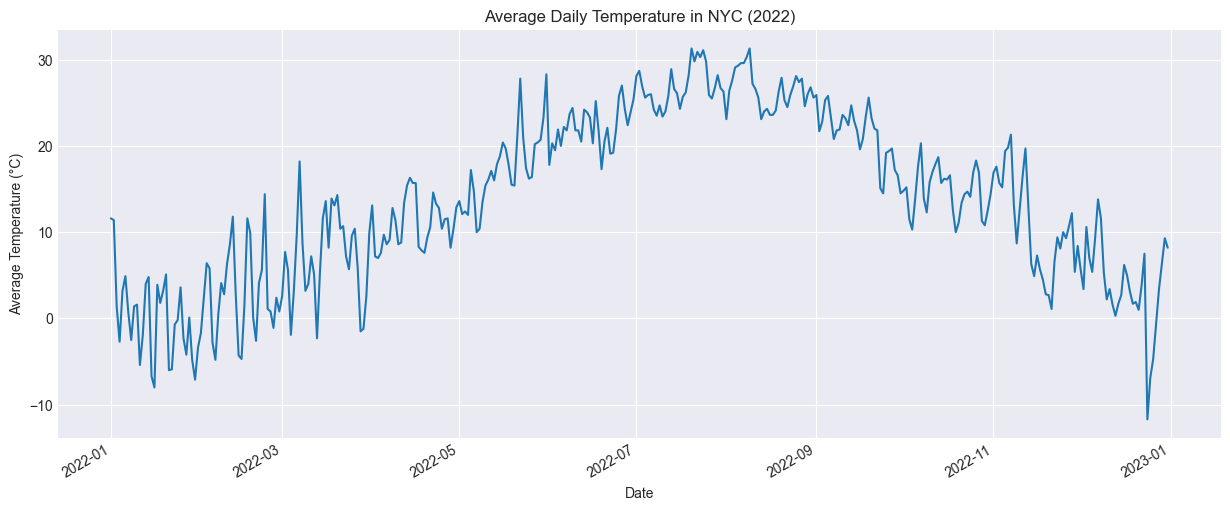

In [3]:
# Create a line plot of the temperatures for 2022 using the simple pandas .plot() method.
print("--- Simple Pandas Plot of 2022 Average Temperatures ---")

# Set figure size for better readability
plt.figure(figsize=(15, 6))

# Use the pandas plotting function
df_daily['avgTemp'].plot(kind='line', title='Average Daily Temperature in NYC (2022)')

# Add labels for clarity
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.show()

#### Dual-Axis Line Chart of Trips and Temperature (Object-Oriented Approach)

Data start date: 2021-01-30 00:00:00
Data end date: 2022-12-31 00:00:00
------------------------------


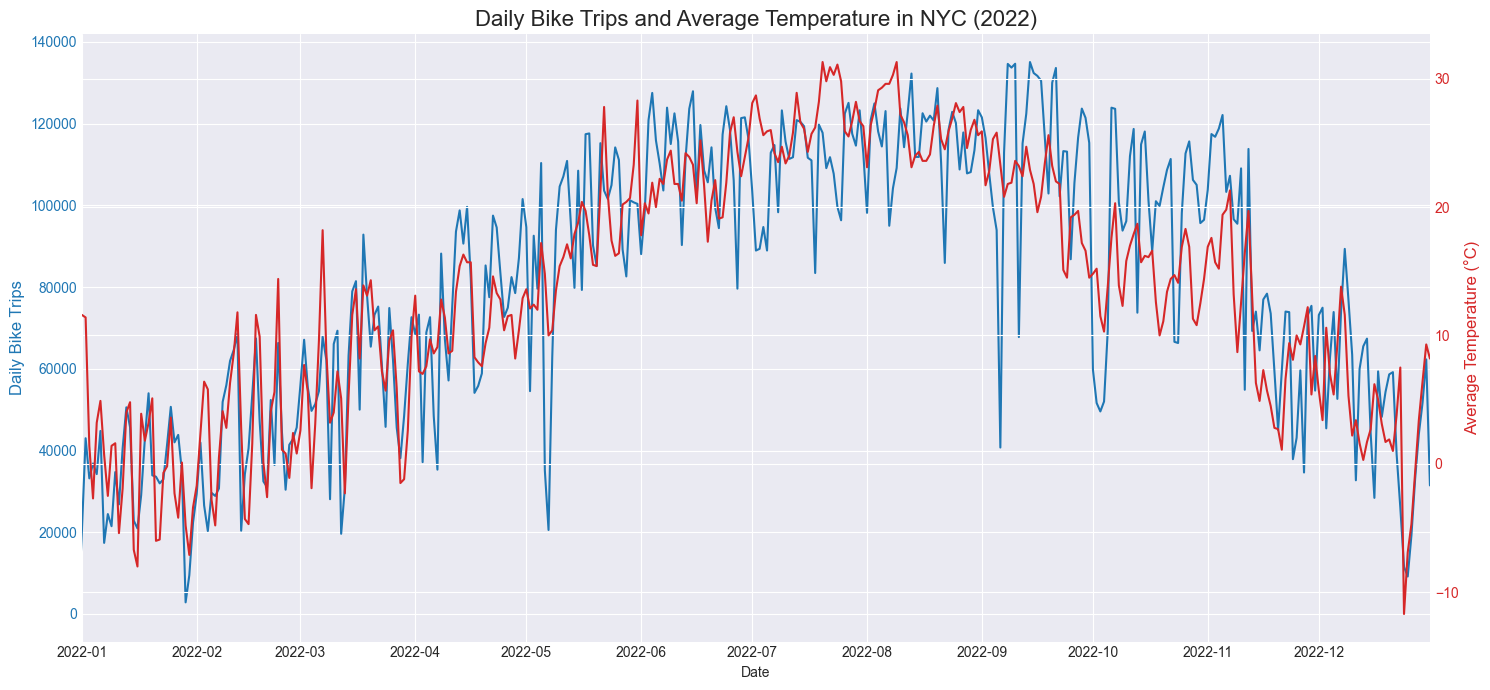

In [4]:
# Create a line chart of bike trip counts and temperatures plotted on a dual axis.
# This requires the Object-Oriented approach for full control over both axes.

# Add a quick diagnostic check to be certain our data range is correct.
print(f"Data start date: {df_daily.index.min()}")
print(f"Data end date: {df_daily.index.max()}")
print("-" * 30)


# 1. Create figure and axis objects with subplots()
fig, ax1 = plt.subplots(figsize=(15, 7))
plt.title('Daily Bike Trips and Average Temperature in NYC (2022)', fontsize=16)

# 2. Plot the bike rides on the primary y-axis (ax1)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Bike Trips', color=color, fontsize=12)
ax1.plot(df_daily.index, df_daily['trip_count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 3. Create a twin object for the second y-axis that shares the same x-axis
ax2 = ax1.twinx()  

# 4. Plot the temperatures on the secondary y-axis (ax2)
color = 'tab:red'
ax2.set_ylabel('Average Temperature (°C)', color=color, fontsize=12)
ax2.plot(df_daily.index, df_daily['avgTemp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# THE DEFINITIVE FIX: Manually create explicit datetime objects for the limits.
# This forces Matplotlib to use the exact range for 2022.
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-12-31')
ax1.set_xlim([start_date, end_date])

# Ensure the layout is tight
fig.tight_layout()  
plt.show()

### Code Explanation: Dual-Axis Chart

To effectively visualize the relationship between daily bike trips and temperature, I used Matplotlib's powerful Object-Oriented (OO) paradigm. This approach was essential because it provides the fine-grained control needed to manage multiple y-axes and refine the plot for clarity.

The process was as follows:
1.  **Initialize Objects:** I began by creating a figure and a primary axes object (ax1) using fig, ax1 = plt.subplots(). This established the main container (fig) and the primary plotting area (ax1) for the bike trip data.
2.  **Plot Primary Data:** On the primary axis (ax1), I plotted the daily bike trip counts, assigning it a distinct color and a descriptive y-axis label.
3.  **Create a Twin Axis:** The crucial step was creating a second axes object (ax2) that shares the same x-axis by calling ax2 = ax1.twinx(). This seamlessly overlaid a secondary y-axis on the right side of the plot for the temperature data.
4.  **Plot Secondary Data:** I then plotted the average temperature data on this new ax2, giving it its own unique color and label to differentiate it from the trip data.
5.  **Refine and Finalize the Plot:** To ensure the final visualization was clear and focused, I manually set the x-axis limits using ax1.set_xlim() to match the exact start and end dates of the 2022 data. This removed extraneous empty space and framed the data perfectly, making the trends easier to interpret.

This object-oriented method was the only way to effectively visualize two variables with vastly different scales (trip counts in the thousands vs. temperatures in tens) on a single, coherent chart. The final, refined graph makes the strong positive correlation between warmer temperatures and increased bike ridership immediately obvious to the viewer.

### BONUS TASK

#### Histogram of Trip Duration with Normal Distribution Curve

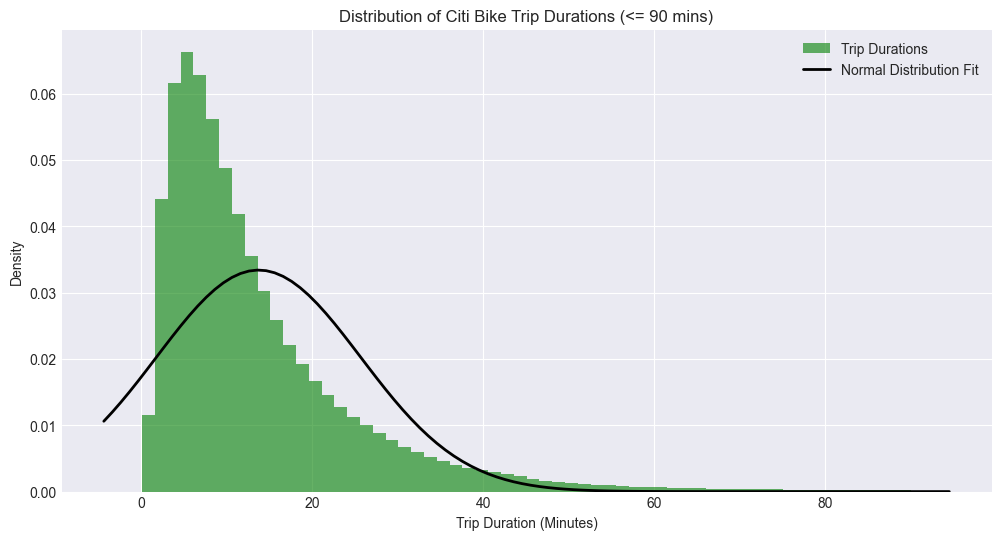

In [5]:
# --- Data Preparation for Duration Calculation ---

# FIX 1: Ensure both start and end columns are proper datetime objects.
# (The 'started_at' column might have been converted earlier, but it's safe to re-run)
df_full['started_at'] = pd.to_datetime(df_full['started_at'])
df_full['ended_at'] = pd.to_datetime(df_full['ended_at'])

# FIX 2: Calculate the trip duration by subtracting the two datetime columns.
# The result is a new column of type 'Timedelta'.
df_full['trip_duration'] = df_full['ended_at'] - df_full['started_at']

# Now, convert the Timedelta object to minutes for our histogram.
df_full['trip_duration_mins'] = df_full['trip_duration'].dt.total_seconds() / 60

# --- Filtering and Plotting (this part remains the same) ---

# Filter out extreme outliers for a more meaningful histogram.
# Let's cap trip duration at 90 minutes.
df_filtered = df_full[(df_full['trip_duration_mins'] > 0) & (df_full['trip_duration_mins'] <= 90)]

# --- Plotting ---
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram. `density=True` is required to overlay the probability density curve.
ax.hist(df_filtered['trip_duration_mins'], bins=60, density=True, alpha=0.6, color='g', label='Trip Durations')

# Add a 'best fit' line (normal distribution curve)
mu, std = norm.fit(df_filtered['trip_duration_mins'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')

# Add titles and labels
ax.set_title('Distribution of Citi Bike Trip Durations (<= 90 mins)')
ax.set_xlabel('Trip Duration (Minutes)')
ax.set_ylabel('Density')
ax.legend()

plt.show()

#### Subplots with Bar and Pie Charts

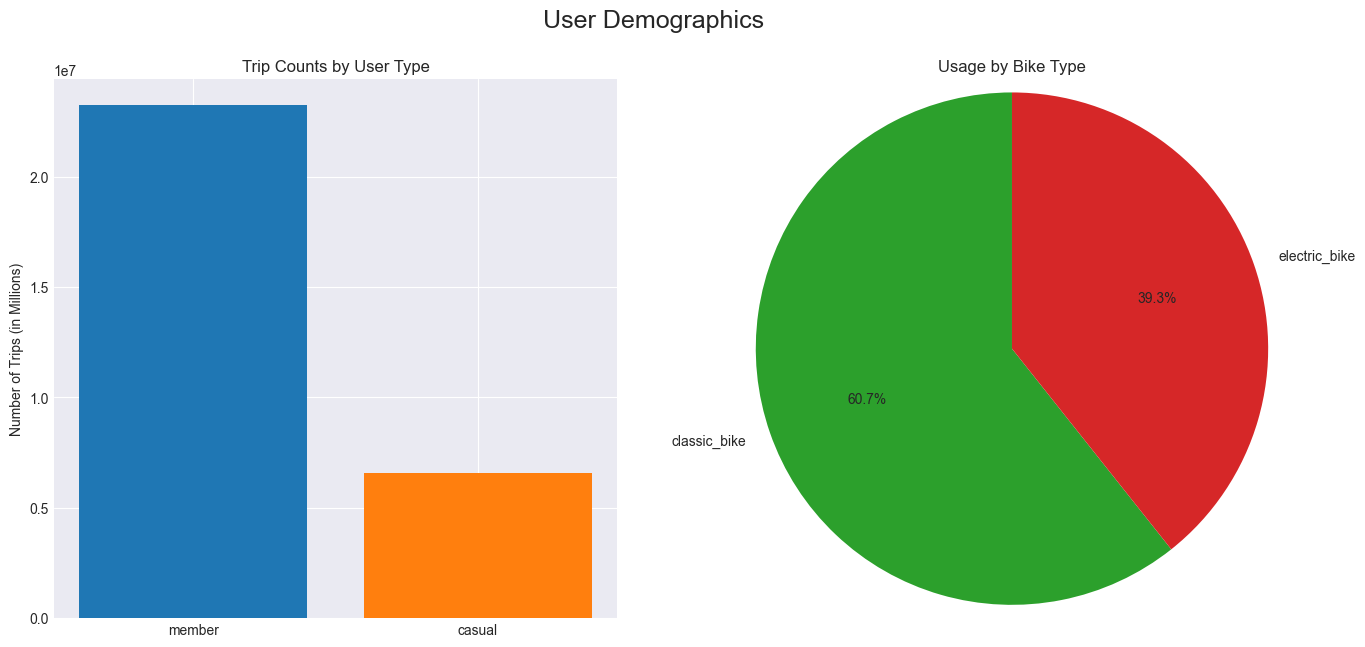

In [6]:
# This requires the OO approach to manage two separate plots (axes) in one figure.

# 1. Create a figure and a set of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
plt.suptitle('User Demographics', fontsize=18)

# --- Plot 1: Bar Chart of User Type on the first axis (axes[0]) ---
user_counts = df_full['member_casual'].value_counts()
axes[0].bar(user_counts.index, user_counts.values, color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Trip Counts by User Type')
axes[0].set_ylabel('Number of Trips (in Millions)')

# --- Plot 2: Pie Chart of Rideable Type on the second axis (axes[1]) ---
# For this example, we'll use 'rideable_type' instead of 'gender' as 'gender' is not in the 2022 dataset.
rideable_counts = df_full['rideable_type'].value_counts()
axes[1].pie(rideable_counts, labels=rideable_counts.index, autopct='%1.1f%%', startangle=90, colors=['#2ca02c', '#d62728', '#9467bd'])
axes[1].set_title('Usage by Bike Type')
axes[1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()